In [88]:
#Import dependency code block
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from datetime import date,timedelta

Get the datadset

In [89]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [90]:
credit_record=pd.read_csv('/dataset/credit_record.csv')
application_record=pd.read_csv('/dataset/application_record.csv')

In [91]:
print(credit_record.head())
print(application_record.head())

        ID  MONTHS_BALANCE STATUS
0  5001711               0      X
1  5001711              -1      0
2  5001711              -2      0
3  5001711              -3      0
4  5001712               0      C
        ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4

# Merge Dataset

In [92]:
joined_df=pd.merge(credit_record, application_record, on='ID')
joined_df.shape
print(joined_df.head())

        ID  MONTHS_BALANCE STATUS CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0  5008804               0      C           M            Y               Y   
1  5008804              -1      C           M            Y               Y   
2  5008804              -2      C           M            Y               Y   
3  5008804              -3      C           M            Y               Y   
4  5008804              -4      C           M            Y               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL NAME_INCOME_TYPE NAME_EDUCATION_TYPE  \
0             0          427500.0          Working    Higher education   
1             0          427500.0          Working    Higher education   
2             0          427500.0          Working    Higher education   
3             0          427500.0          Working    Higher education   
4             0          427500.0          Working    Higher education   

  NAME_FAMILY_STATUS NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  FLAG_MOBIL  \
0    

In [93]:
#Preview data information
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   MONTHS_BALANCE       777715 non-null  int64  
 2   STATUS               777715 non-null  object 
 3   CODE_GENDER          777715 non-null  object 
 4   FLAG_OWN_CAR         777715 non-null  object 
 5   FLAG_OWN_REALTY      777715 non-null  object 
 6   CNT_CHILDREN         777715 non-null  int64  
 7   AMT_INCOME_TOTAL     777715 non-null  float64
 8   NAME_INCOME_TYPE     777715 non-null  object 
 9   NAME_EDUCATION_TYPE  777715 non-null  object 
 10  NAME_FAMILY_STATUS   777715 non-null  object 
 11  NAME_HOUSING_TYPE    777715 non-null  object 
 12  DAYS_BIRTH           777715 non-null  int64  
 13  DAYS_EMPLOYED        777715 non-null  int64  
 14  FLAG_MOBIL           777715 non-null  int64  
 15  FLAG_WORK_PHONE  

In [94]:
# So, since data must be of a numeric type for machine learning,
# we will have to transform some data, get rid of unnecessary data, as well as missing data.
joined_df['ID'].nunique()

36457

# DATA PROCESSING AND ANALYSIS

In [95]:
joined_df['OCCUPATION_TYPE'] = joined_df['OCCUPATION_TYPE'].fillna('others')

In [96]:
joined_df.isnull().sum()

ID                     0
MONTHS_BALANCE         0
STATUS                 0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
dtype: int64

In [97]:
joined_df.shape

(777715, 20)

In [98]:
joined_df.drop(['CODE_GENDER','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','DAYS_EMPLOYED','FLAG_WORK_PHONE'], axis=1, inplace=True)

In [99]:
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                777715 non-null  int64  
 1   MONTHS_BALANCE    777715 non-null  int64  
 2   STATUS            777715 non-null  object 
 3   FLAG_OWN_CAR      777715 non-null  object 
 4   FLAG_OWN_REALTY   777715 non-null  object 
 5   CNT_CHILDREN      777715 non-null  int64  
 6   AMT_INCOME_TOTAL  777715 non-null  float64
 7   DAYS_BIRTH        777715 non-null  int64  
 8   FLAG_MOBIL        777715 non-null  int64  
 9   FLAG_PHONE        777715 non-null  int64  
 10  FLAG_EMAIL        777715 non-null  int64  
 11  OCCUPATION_TYPE   777715 non-null  object 
 12  CNT_FAM_MEMBERS   777715 non-null  float64
dtypes: float64(2), int64(7), object(4)
memory usage: 83.1+ MB


STATUS

In [100]:
# percent of missing "Status"
print('Percent of missing "STATUS" records is %.2f%%' %((joined_df['STATUS'].isnull().sum()/joined_df.shape[0])*100))

Percent of missing "STATUS" records is 0.00%


Number of people who take a loan group by STATUS:
C    329536
0    290654
X    145950
1      8747
5      1527
2       801
3       286
4       214
Name: STATUS, dtype: int64


<Axes: xlabel='STATUS', ylabel='count'>

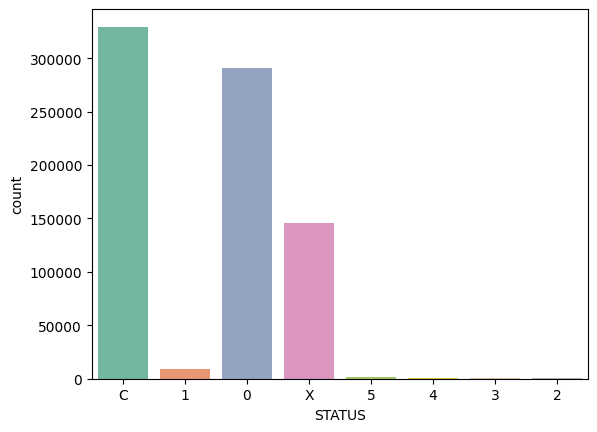

In [101]:
print("Number of people who take a loan group by STATUS:")
print(joined_df['STATUS'].value_counts())
sns.countplot(x='STATUS', data=joined_df, palette = 'Set2')

0: 1-29 days past due 1: 30-59 days past due 2: 60-89 days overdue 3: 90-119 days overdue 4: 120-149 days overdue 5: Overdue or bad debts, write-offs for more than 150 days C: paid off that month X: No loan for the month

FLAG_OWN_CAR means ownership of car

In [102]:
# percent of missing "FLAG_OWN_CAR"
print('Percent of missing "FLAG_OWN_CAR" records is %.2f%%' %((joined_df['FLAG_OWN_CAR'].isnull().sum()/joined_df.shape[0])*100))

Percent of missing "FLAG_OWN_CAR" records is 0.00%


Number of people who take a loan group by property car:
N    473355
Y    304360
Name: FLAG_OWN_CAR, dtype: int64


<Axes: xlabel='FLAG_OWN_CAR', ylabel='count'>

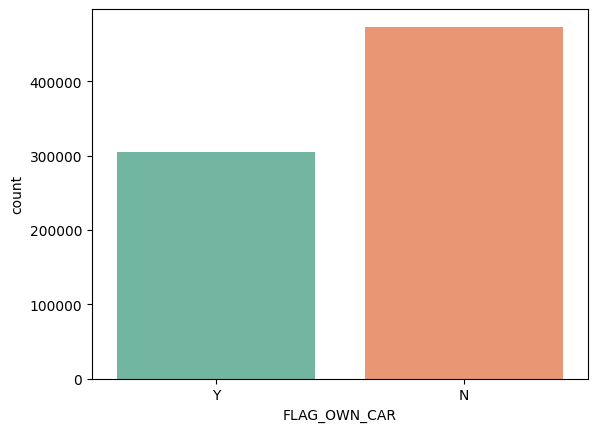

In [103]:
print("Number of people who take a loan group by property car:")
print(joined_df['FLAG_OWN_CAR'].value_counts())
sns.countplot(x='FLAG_OWN_CAR', data=joined_df, palette = 'Set2')

FLAG_OWN_REALTY means ownership of a property

In [104]:
# percent of missing "FLAG_OWN_REALTY"
print('Percent of missing "FLAG_OWN_REALTY" records is %.2f%%' %((joined_df['FLAG_OWN_REALTY'].isnull().sum()/joined_df.shape[0])*100))

Percent of missing "FLAG_OWN_REALTY" records is 0.00%


Number of people who take a loan group by property ownership:
Y    512948
N    264767
Name: FLAG_OWN_REALTY, dtype: int64


<Axes: xlabel='FLAG_OWN_REALTY', ylabel='count'>

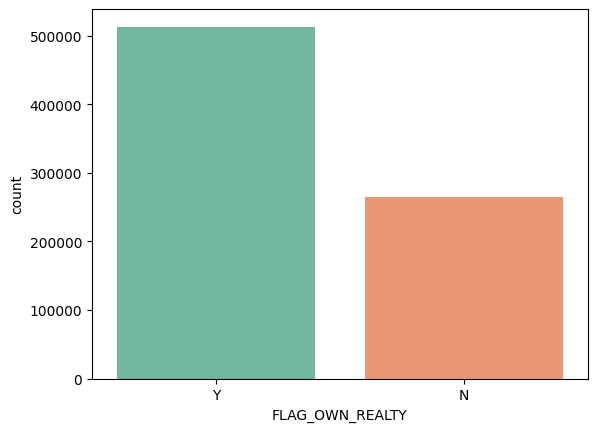

In [105]:
print("Number of people who take a loan group by property ownership:")
print(joined_df['FLAG_OWN_REALTY'].value_counts())
sns.countplot(x='FLAG_OWN_REALTY', data=joined_df, palette = 'Set2')

CNT_CHILDREN means Number of Children

In [106]:
# percent of missing "CNT_CHILDREN"
print('Percent of missing "CNT_CHILDREN" records is %.2f%%' %((joined_df['CNT_CHILDREN'].isnull().sum()/joined_df.shape[0])*100))

Percent of missing "CNT_CHILDREN" records is 0.00%


Number of people who take a loan group by number of children:
0     540639
1     155638
2      70399
3       9328
4       1224
5        324
14       111
7         46
19         6
Name: CNT_CHILDREN, dtype: int64


<Axes: xlabel='CNT_CHILDREN', ylabel='count'>

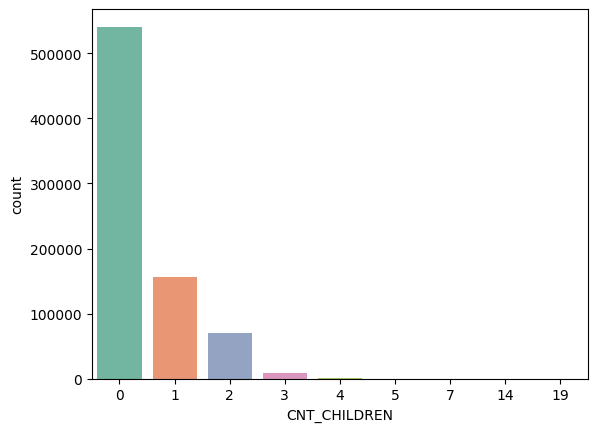

In [107]:
print("Number of people who take a loan group by number of children:")
print(joined_df['CNT_CHILDREN'].value_counts())
sns.countplot(x='CNT_CHILDREN', data=joined_df, palette = 'Set2')

AMT_INCOME_TOTAL means Annual Income

In [108]:
# percent of missing "AMT_INCOME_TOTAL"
print('Percent of missing "AMT_INCOME_TOTAL" records is %.2f%%' %((joined_df['AMT_INCOME_TOTAL'].isnull().sum()/joined_df.shape[0])*100))

Percent of missing "AMT_INCOME_TOTAL" records is 0.00%


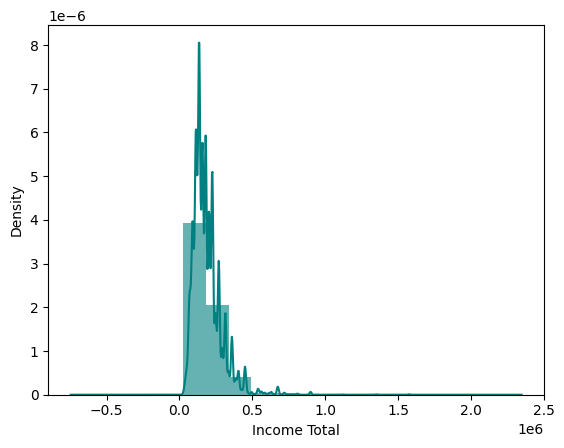

In [109]:
ax = joined_df["AMT_INCOME_TOTAL"].hist(density=True, stacked=True, color='teal', alpha=0.6)
joined_df["AMT_INCOME_TOTAL"].plot(kind='density', color='teal')
ax.set(xlabel='Income Total')
plt.show()

In [110]:
joined_df.shape

(777715, 13)

In [111]:
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                777715 non-null  int64  
 1   MONTHS_BALANCE    777715 non-null  int64  
 2   STATUS            777715 non-null  object 
 3   FLAG_OWN_CAR      777715 non-null  object 
 4   FLAG_OWN_REALTY   777715 non-null  object 
 5   CNT_CHILDREN      777715 non-null  int64  
 6   AMT_INCOME_TOTAL  777715 non-null  float64
 7   DAYS_BIRTH        777715 non-null  int64  
 8   FLAG_MOBIL        777715 non-null  int64  
 9   FLAG_PHONE        777715 non-null  int64  
 10  FLAG_EMAIL        777715 non-null  int64  
 11  OCCUPATION_TYPE   777715 non-null  object 
 12  CNT_FAM_MEMBERS   777715 non-null  float64
dtypes: float64(2), int64(7), object(4)
memory usage: 83.1+ MB


In [112]:
# Now, it's time to parse the data type object.
# It is necessary to determine whether they have any value for evaluating credit,
# and also to evaluate the possibility of converting data to a numeric type.

objects_data = pd.DataFrame(joined_df.dtypes =='object').reset_index()
object_type = objects_data[objects_data[0] == True]['index']
object_type

2              STATUS
3        FLAG_OWN_CAR
4     FLAG_OWN_REALTY
11    OCCUPATION_TYPE
Name: index, dtype: object

In [113]:
# First, let's find out what data the columns contain so that we can properly train our model.
# Since we see that there are quite a lot of important parameters,
# we will try to translate all this into numerical values.

a = joined_df[object_type]['STATUS'].value_counts()
b = joined_df[object_type]['FLAG_OWN_CAR'].value_counts()
c = joined_df[object_type]['FLAG_OWN_REALTY'].value_counts()
d = joined_df[object_type]['OCCUPATION_TYPE'].value_counts()



print('\n',a,'\n\n',b,'\n\n',c,'\n\n',d)


 C    329536
0    290654
X    145950
1      8747
5      1527
2       801
3       286
4       214
Name: STATUS, dtype: int64 

 N    473355
Y    304360
Name: FLAG_OWN_CAR, dtype: int64 

 Y    512948
N    264767
Name: FLAG_OWN_REALTY, dtype: int64 

 others                   240048
Laborers                 131572
Core staff                77112
Sales staff               70362
Managers                  67738
Drivers                   47678
High skill tech staff     31768
Accountants               27223
Medicine staff            26691
Cooking staff             13416
Security staff            12400
Cleaning staff            11399
Private service staff      6714
Low-skill Laborers         3623
Secretaries                3149
Waiters/barmen staff       2557
HR staff                   1686
IT staff                   1319
Realty agents              1260
Name: OCCUPATION_TYPE, dtype: int64


## Apply One Hot Encoding for "OCCUPATION_TYPES"

In [114]:
#OneHotEncoding for Occupation types
joined_df=pd.concat([joined_df.drop('OCCUPATION_TYPE', axis=1), pd.get_dummies(joined_df['OCCUPATION_TYPE'], prefix='OCCUPATION_TYPE')], axis=1)

In [115]:
# # Now, let's convert all non-numeric data to numeric data using LabelEncoder().
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in joined_df:
    if joined_df[x].dtypes == 'object':
        joined_df[x] = le.fit_transform(joined_df[x])
        print(dict(zip(le.classes_, le.transform(le.classes_))))
    if joined_df[x].dtypes == 'uint8':
      joined_df[x] = joined_df[x].astype('int64')

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, 'C': 6, 'X': 7}
{'N': 0, 'Y': 1}
{'N': 0, 'Y': 1}


In [116]:
joined_df.head()

,ID,MONTHS_BALANCE,STATUS,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,FLAG_MOBIL,FLAG_PHONE,...,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_others
0,5008804,0,6,1,1,0,427500.0,-12005,1,0,...,0,0,0,0,0,0,0,0,0,1
1,5008804,-1,6,1,1,0,427500.0,-12005,1,0,...,0,0,0,0,0,0,0,0,0,1
2,5008804,-2,6,1,1,0,427500.0,-12005,1,0,...,0,0,0,0,0,0,0,0,0,1
3,5008804,-3,6,1,1,0,427500.0,-12005,1,0,...,0,0,0,0,0,0,0,0,0,1
4,5008804,-4,6,1,1,0,427500.0,-12005,1,0,...,0,0,0,0,0,0,0,0,0,1


In [117]:
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'N': 0, 'Y': 1}


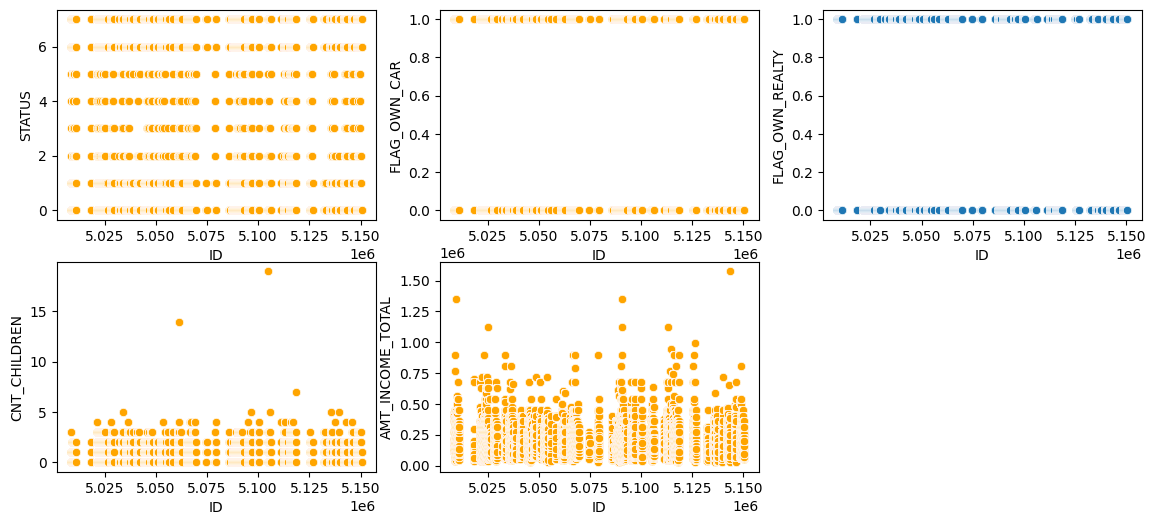

In [118]:
fig, ax= plt.subplots(nrows= 2, ncols = 3, figsize= (14,6))


sns.scatterplot(x='ID', y='STATUS', data=joined_df, ax=ax[0][0], color= 'orange')
sns.scatterplot(x='ID', y='FLAG_OWN_CAR', data=joined_df, ax=ax[0][1], color='orange')
sns.scatterplot(x='ID', y='FLAG_OWN_REALTY', data=joined_df, ax=ax[0][2])
sns.scatterplot(x='ID', y='CNT_CHILDREN', data=joined_df, ax=ax[1][0], color='orange')
sns.scatterplot(x='ID', y='AMT_INCOME_TOTAL', data=joined_df, ax=ax[1][1], color= 'orange')

fig.delaxes(ax[1][2])

# So, as a result, we have emissions in CNT_CHILDREN, AMT_INCOME_TOTAL
# This can have a bad effect on model training, so you need to exclude outliers from the data sample.



Menghilangkan outlier

In [119]:
# for CNT_CHILDREN
# q_hi = joined_df['CNT_CHILDREN'].quantile(0.999)
# q_low = joined_df['CNT_CHILDREN'].quantile(0.001)
# joined_df = joined_df[(joined_df['CNT_CHILDREN']>q_low) & (joined_df['CNT_CHILDREN']<q_hi)]



In [120]:
# for AMT_INCOME_TOTAL
# q_hi = joined_df['AMT_INCOME_TOTAL'].quantile(0.999)
# q_low = joined_df['AMT_INCOME_TOTAL'].quantile(0.001)
# joined_df = joined_df[(joined_df['AMT_INCOME_TOTAL']>q_low) & (joined_df['AMT_INCOME_TOTAL']<q_hi)]

In [121]:
# Repeat what we did before

#fig, ax= plt.subplots(nrows= 2, ncols = 3, figsize= (14,6))

#sns.scatterplot(x='ID', y='STATUS', data=joined_df, ax=ax[0][0], color= 'orange')
#sns.scatterplot(x='ID', y='FLAG_OWN_CAR', data=joined_df, ax=ax[0][1], color='orange')
#sns.scatterplot(x='ID', y='FLAG_OWN_REALTY', data=joined_df, ax=ax[0][2])
#sns.scatterplot(x='ID', y='CNT_CHILDREN', data=joined_df, ax=ax[1][0], color='orange')
#sns.scatterplot(x='ID', y='AMT_INCOME_TOTAL', data=joined_df, ax=ax[1][1], color= 'orange')

#fig.delaxes(ax[1][2])



In [122]:
joined_df['STATUS'].value_counts()



6    329536
0    290654
7    145950
1      8747
5      1527
2       801
3       286
4       214
Name: STATUS, dtype: int64

In [123]:
joined_df.nunique()

ID                                       36457
MONTHS_BALANCE                              61
STATUS                                       8
FLAG_OWN_CAR                                 2
FLAG_OWN_REALTY                              2
CNT_CHILDREN                                 9
AMT_INCOME_TOTAL                           265
DAYS_BIRTH                                7183
FLAG_MOBIL                                   1
FLAG_PHONE                                   2
FLAG_EMAIL                                   2
CNT_FAM_MEMBERS                             10
OCCUPATION_TYPE_Accountants                  2
OCCUPATION_TYPE_Cleaning staff               2
OCCUPATION_TYPE_Cooking staff                2
OCCUPATION_TYPE_Core staff                   2
OCCUPATION_TYPE_Drivers                      2
OCCUPATION_TYPE_HR staff                     2
OCCUPATION_TYPE_High skill tech staff        2
OCCUPATION_TYPE_IT staff                     2
OCCUPATION_TYPE_Laborers                     2
OCCUPATION_TY

In [124]:
# Now you need to slightly correct the data in STATUS.
# Any bank will not lend to a person who is already in debt,
# so let 0 be no debt at all (including debt repayment this month (C) and no credit history (X)).
# Otherwise 1 - this means the presence of any debt at all.

# joined_df['STATUS'].replace({'C': -1, 'X' : -1}, inplace=True)
# joined_df['STATUS'] = joined_df['STATUS'].astype('int')
# 1 riskan 0 aman
joined_df['TARGET'] = joined_df['STATUS'].apply(lambda x:1 if x >= 0 and x<=5 else 0)

In [125]:
joined_df['STATUS'].value_counts()

6    329536
0    290654
7    145950
1      8747
5      1527
2       801
3       286
4       214
Name: STATUS, dtype: int64

In [126]:
joined_df['TARGET'].value_counts()

0    475486
1    302229
Name: TARGET, dtype: int64

In [127]:
# Before continuing our research, let's count how many people have paid off their loans,
# and how many still have debts.

joined_df['TARGET'].value_counts(normalize = True)

# As you can see, we are seeing the phenomenon of oversampling:
# 99% of people have paid off their debt, 1% have not yet done so.
# This means that our sample may not be representative, and the machine will not be able to correctly learn
# to determine who should be given a credit and who should not.
# To fix the problem, we need to merge both sets of our data

0    0.611388
1    0.388612
Name: TARGET, dtype: float64

In [128]:
# Next, we'll create a new cstory_gbid dataset that we'll group by loan applicant ID.
# This way we can successfully link both tables.
# For convenience, we'll make the ID the index of the table.

joined_df_gbid = joined_df.groupby('ID').agg(max).reset_index()
joined_df_gbid

,ID,MONTHS_BALANCE,STATUS,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,FLAG_MOBIL,FLAG_PHONE,...,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_others,TARGET
0,5008804,0,7,1,1,0,427500.0,-12005,1,0,...,0,0,0,0,0,0,0,0,1,1
1,5008805,0,7,1,1,0,427500.0,-12005,1,0,...,0,0,0,0,0,0,0,0,1,1
2,5008806,0,7,1,1,0,112500.0,-21474,1,0,...,0,0,0,0,0,0,1,0,0,1
3,5008808,0,7,0,1,0,270000.0,-19110,1,1,...,0,0,0,0,1,0,0,0,0,1
4,5008809,-22,7,0,1,0,270000.0,-19110,1,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5150482,-11,6,1,1,1,157500.0,-10808,1,0,...,0,0,0,0,0,0,0,0,0,1
36453,5150483,0,7,1,1,1,157500.0,-10808,1,0,...,0,0,0,0,0,0,0,0,0,0
36454,5150484,0,6,1,1,1,157500.0,-10808,1,0,...,0,0,0,0,0,0,0,0,0,1
36455,5150485,0,0,1,1,1,157500.0,-10808,1,0,...,0,0,0,0,0,0,0,0,0,1


In [129]:
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 32 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   ID                                     777715 non-null  int64  
 1   MONTHS_BALANCE                         777715 non-null  int64  
 2   STATUS                                 777715 non-null  int64  
 3   FLAG_OWN_CAR                           777715 non-null  int64  
 4   FLAG_OWN_REALTY                        777715 non-null  int64  
 5   CNT_CHILDREN                           777715 non-null  int64  
 6   AMT_INCOME_TOTAL                       777715 non-null  float64
 7   DAYS_BIRTH                             777715 non-null  int64  
 8   FLAG_MOBIL                             777715 non-null  int64  
 9   FLAG_PHONE                             777715 non-null  int64  
 10  FLAG_EMAIL                             777715 non-null  

In [130]:
joined_df.drop(columns=['ID', "MONTHS_BALANCE", "STATUS", 'DAYS_BIRTH'], inplace=True)

In [131]:
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 28 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   FLAG_OWN_CAR                           777715 non-null  int64  
 1   FLAG_OWN_REALTY                        777715 non-null  int64  
 2   CNT_CHILDREN                           777715 non-null  int64  
 3   AMT_INCOME_TOTAL                       777715 non-null  float64
 4   FLAG_MOBIL                             777715 non-null  int64  
 5   FLAG_PHONE                             777715 non-null  int64  
 6   FLAG_EMAIL                             777715 non-null  int64  
 7   CNT_FAM_MEMBERS                        777715 non-null  float64
 8   OCCUPATION_TYPE_Accountants            777715 non-null  int64  
 9   OCCUPATION_TYPE_Cleaning staff         777715 non-null  int64  
 10  OCCUPATION_TYPE_Cooking staff          777715 non-null  

<Axes: >

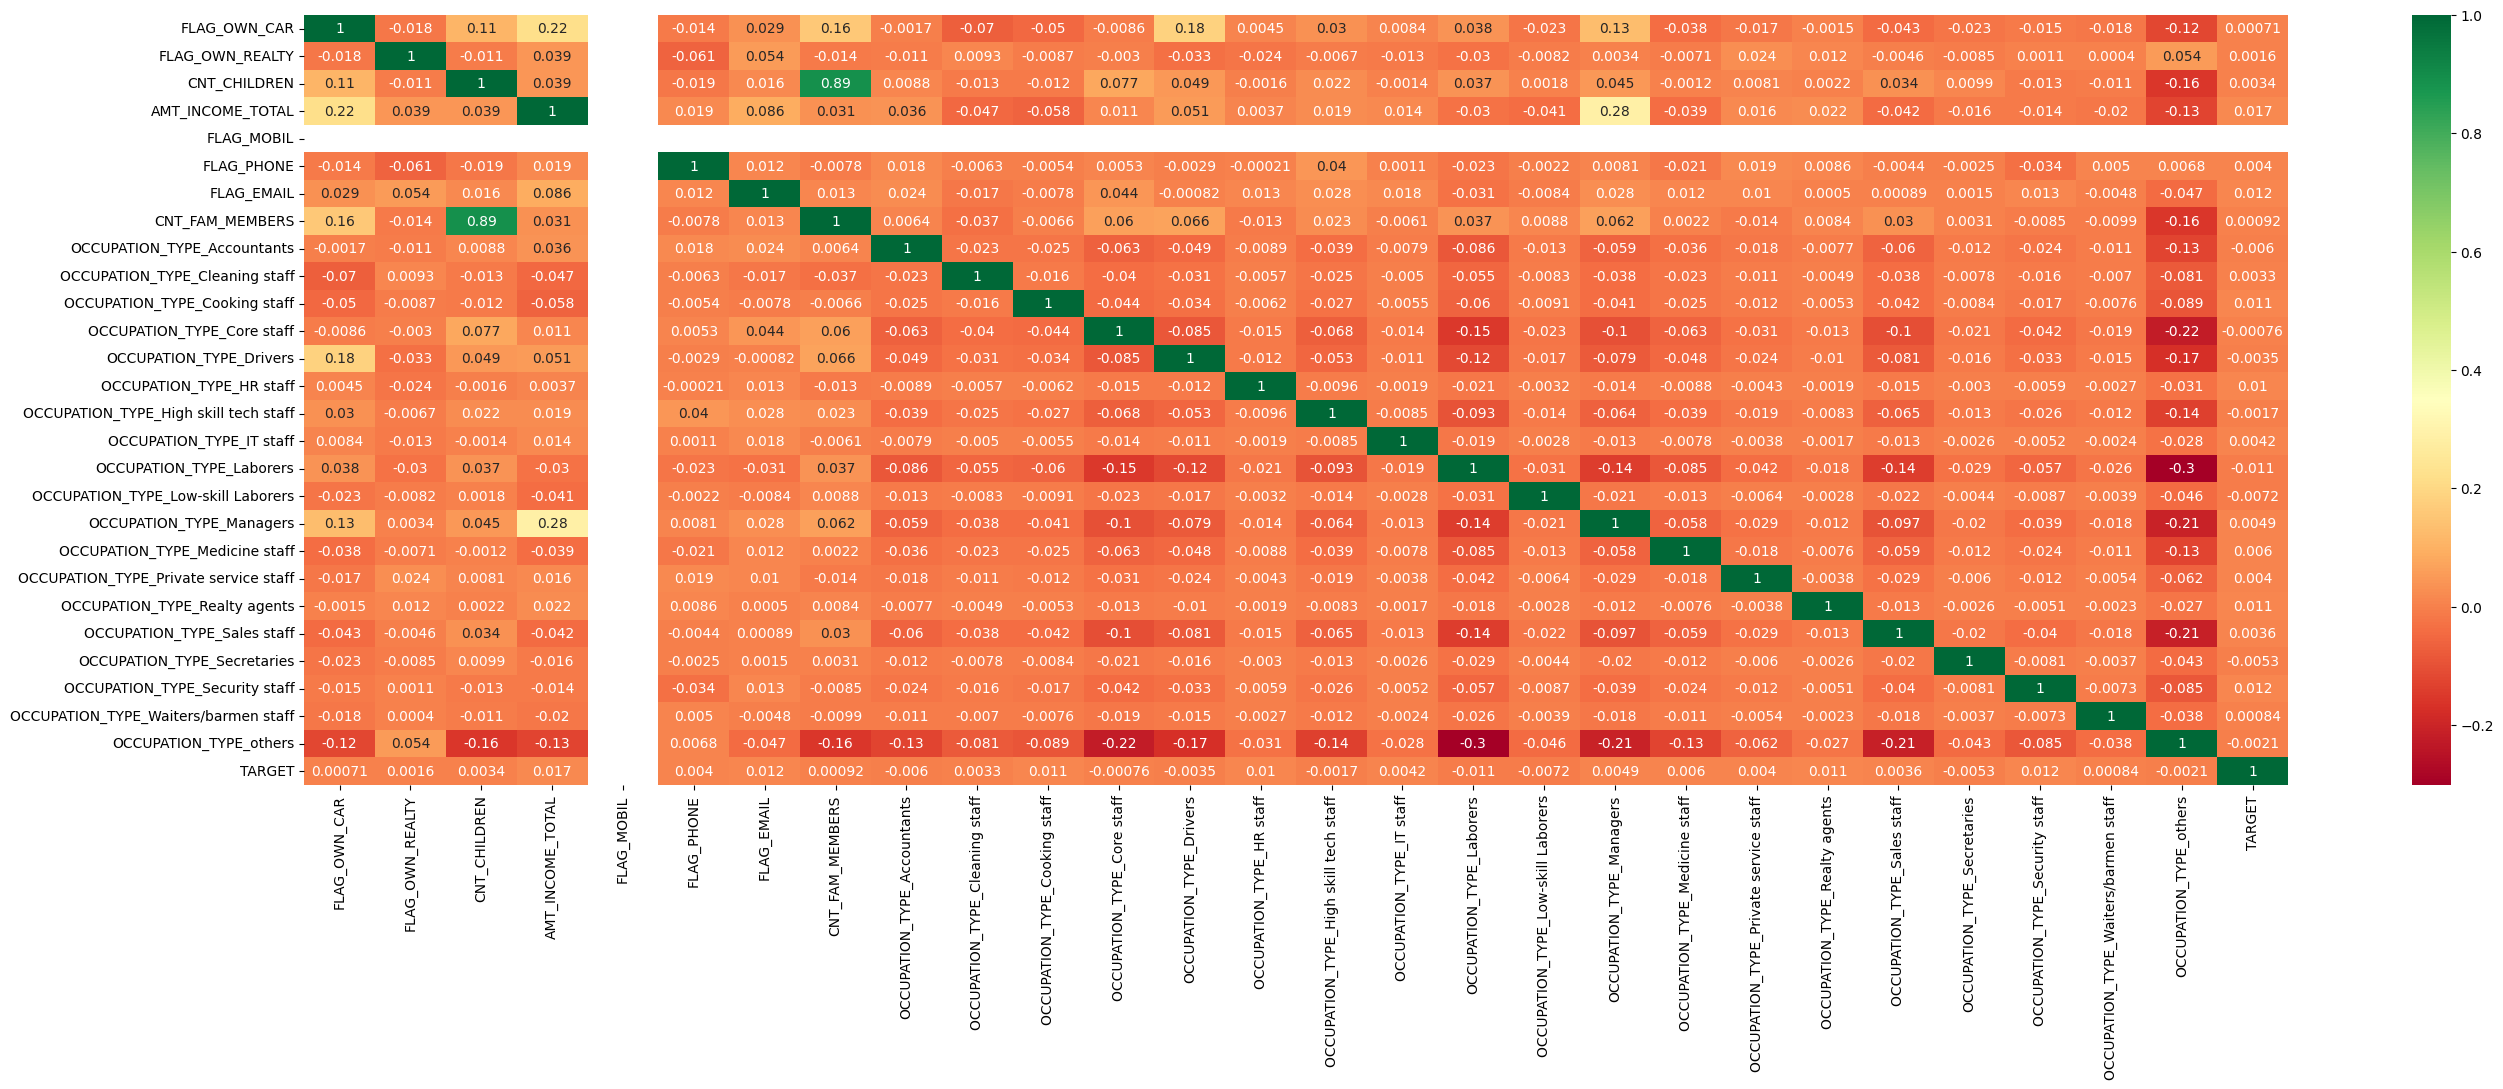

In [132]:
plt.figure(figsize=(32,10))
sns.heatmap(joined_df.corr(),annot=True,cmap='RdYlGn')

# Data Splitting

In [133]:
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 28 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   FLAG_OWN_CAR                           777715 non-null  int64  
 1   FLAG_OWN_REALTY                        777715 non-null  int64  
 2   CNT_CHILDREN                           777715 non-null  int64  
 3   AMT_INCOME_TOTAL                       777715 non-null  float64
 4   FLAG_MOBIL                             777715 non-null  int64  
 5   FLAG_PHONE                             777715 non-null  int64  
 6   FLAG_EMAIL                             777715 non-null  int64  
 7   CNT_FAM_MEMBERS                        777715 non-null  float64
 8   OCCUPATION_TYPE_Accountants            777715 non-null  int64  
 9   OCCUPATION_TYPE_Cleaning staff         777715 non-null  int64  
 10  OCCUPATION_TYPE_Cooking staff          777715 non-null  

In [134]:
x= joined_df.drop(['TARGET'], axis=True)
y= joined_df['TARGET']


Class=0, n=302229 (50.000%)
Class=1, n=302229 (50.000%)


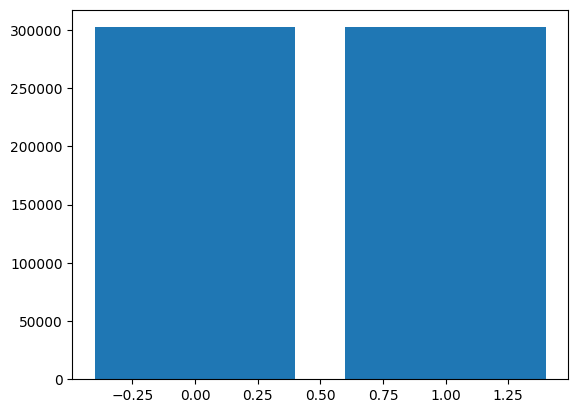

In [135]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scaled=x
# x_scaled['AMT_INCOME_TOTAL'] = sc.fit_transform(x['AMT_INCOME_TOTAL'].values.reshape(-1,1))
undersample = RandomUnderSampler(random_state=0)
X, y = undersample.fit_resample(x_scaled, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [136]:
# First, we divide the data in half:
# into those that will be used to train the model
# and those that will be used to predict approval.

# Usually, it is customary to divide the data as follows:
# 70% is used for training the model, and 30% for testing.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [137]:
!pip install tensorflow-decision-forests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [138]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline


In [139]:
np_X_train = X_train.values
np_y_train = y_train.values
np_X_test = X_test.values
np_y_test = y_test.values

In [162]:
model = tfdf.keras.RandomForestModel(num_trees=100, task=tfdf.keras.Task.CLASSIFICATION)
model.compile(metrics=["accuracy"])
# keras_X_train = pd.merge(X_train, y_train, left_index=True, right_index=True, how='outer')
# keras_X_train = tfdf.keras.pd_dataframe_to_tf_dataset(keras_X_train, label='TARGET')
model.fit(np_X_train, np_y_train)

Use /tmp/tmplbnsaa2c as temporary training directory
Reading training dataset...


Training dataset read in 0:00:03.909189. Found 423120 examples.
Training model...
Model trained in 0:02:05.312117
Compiling model...


Model compiled.


In [172]:
np_X_train[0].reshape(1, 27)

array([[0.000e+00, 1.000e+00, 2.000e+00, 1.125e+05, 1.000e+00, 1.000e+00,
        1.000e+00, 4.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00]])

In [174]:
test_load_model = tf.keras.saving.load_model("/content/saved_model/loan_approval_model")
test_load_model.predict(np_X_train[0].reshape(1, 27))

1/1 [==============================] - 0s 192ms/step


array([[0.33999994]], dtype=float32)

In [175]:

loss, accuracy = model.evaluate(np_X_test, np_y_test, verbose=1)

5667/5667 [==============================] - 18s 3ms/step - loss: 0.0000e+00 - accuracy: 0.5659


In [179]:
import shutil

# Specify the path of the folder you want to download
folder_path = '/content/saved_model/loan_approval_model'

# Specify the path where you want to save the downloaded zip file
zip_file_path = '/content/download'

# Create a zip file of the folder
shutil.make_archive(zip_file_path, 'zip', folder_path)

# Download the zip file
from google.colab import files
files.download(zip_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [143]:
model.save('saved_model/loan_approval_model')

In [ ]:
test_labels = y_test
predicted_labels = np.argmax(predictions, axis=1)

# Calculate the evaluation metrics
accuracy = accuracy_score(test_labels, predicted_labels)
precision = precision_score(test_labels, predicted_labels, average='macro')
recall = recall_score(test_labels, predicted_labels, average='macro')
f1 = f1_score(test_labels, predicted_labels, average='macro')

# Print the evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)